# Recurrent Neural Network

### Vocabulary
* Tokens: the units that you can break text into
* One-hot encoding: converting integer values into a vector the size of the maximum value of the integer, where the value of the integer is encoded in the location of the 1. Typically 0 is unassigned.
* Feature hashing: store hashes of the tokens in a sample. This is so that if later, additional tokens are added more columns dont have to be added to the data. To avoid hash collisions, the size of the hash can be increased.
* Word embedding: associate each word with a floating point vector which can be much shorter than a one-hot encoded vector. The idea is to geometrically map the meanings of the words - the example Chollet gave was female being a geometric transformation of king that produces queen (2018, p. 185)
* Feedforward: take the entire sample at once (no memory)
* Recurrence: internal loop within the network
  * Typically timeseries samples of shape (timesteps, input features)
  * The previous output is the model is the data that is fed into the next
* Vanishing gradient: when you use the sigmoid or tanh activations, which are by definition limited to max absolute value of 1, the gradient has many values < 1 multiplied together. This results in a tiny gradient that barely has any effect. This is especially prevalent in RNNs because they often have sigmoid or Tanh and are really extremely deep ANNs.

<center>Resources</center>

Chollet, F. (2018). Deep learning with Python. Manning Publications Co

http://www.wildml.com/2015/10/recurrent-neural-network-tutorial-part-4-implementing-a-grulstm-rnn-with-python-and-theano/

https://colah.github.io/posts/2015-08-Understanding-LSTMs/

In [3]:
# Simple
# The for loop can be expanded so that the recurring part forms a longer neural network

import numpy as np

timesteps = 1000
input_features = 32
output_features = 64

U = np.random.random((output_features, output_features))
W = np.random.random((output_features, input_features))
b = np.random.random((output_features,))

inputs = np.random.random((timesteps, input_features))
state = np.zeros(output_features,)

all_outputs = []
for input_ in inputs:
    output = np.tanh(np.dot(W, input_), np.dot(U, state) + b)
    state = output
    all_outputs.append(output)

In [ ]:
# Long-Short Term RNN / GRU RNN
# Note: this implementation is psuedo-python. not to be run.

import numpy as np
import math
def sigmoid(x):
  return 1 / (1 + math.exp(-x))

timesteps = 1000
input_features = 32
output_features = 64

Uo = np.random.random((output_features, output_features))
Wo = np.random.random((output_features, input_features))
Vo = np.random.random((output_features, input_features))
b = np.random.random((output_features,))

inputs = np.random.random((timesteps, input_features))
state_t = np.zeros(output_features,)

# The addition is the carry value, which is meant to carry the long term memory
# The use for this is to stop the vanishing gradient problem, where in the chain rule, due to the fact that many outputs are <1 (particularily from tanh and sigmoid activations), the gradient ends up being a very small fraction. Therefore there is little to go off of 
# VGP occurs with neural networks with many layers
# This also applies to RNNs because they are just really deep neural networks!

c_t = np.zeros(output_features,)

all_outputs = []
for input_t in inputs:
    # how the c_t is inputted varies
    # Sometimes: output_t = np.tanh(np.dot(Wo, input_t), np.dot(Uo, state_t) + bo)
    # And the c_t value is integrated by: output_t*tanh(c_t)
    output_t = np.tanh(np.dot(Wo, input_t), np.dot(Uo, state_t), np.dot(Vo, c_t) + b)
    state_t = output_t
    all_outputs.append(output_t)
    
    
    f_t = sigmoid(np.dot(state_t, Uf) + np.dot(input_t, Wf) + bf) # Called the forgetting gate because it determines how much is remembered (f_t) and how much is forgotten (1-f_t)
    i_t = sigmoid(np.dot(state_t, Ui) + np.dot(input_t, Wi) + bi) # Called the input gate because decides how much new info is injected
    k_t = tanh(np.dot(state_t, Uk) + np.dot(input_t, Wk) + bk) # The new C_t candidate
    c_t =  f_t*c_t + i_t*k_t
    
# Note: GRU is very similar to above, except it uses only 1 gate to decide how much of the old and new information are combined (the reset gate combines forget and input). Similar to LSTM, it uses another gate to decide how much of this carry is included in the data. 

In [5]:
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing import sequence

max_features = 10000
maxlen = 500
batch_size = 32

(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words = max_features)

x_train = sequence.pad_sequences(x_train, maxlen = maxlen)
x_test = sequence.pad_sequences(x_test, maxlen = maxlen)

In [12]:
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers 
from tensorflow.keras.optimizers import RMSprop

model = Sequential()
model.add(layers.Embedding(max_features, 32))
model.add(layers.LSTM(32))
model.add(layers.Dense(1, activation = 'sigmoid'))

model.compile(optimizer = 'rmsprop',
               loss = 'binary_crossentropy',
               metrics = ['acc'],
              )

history = model.fit(x_train, y_train,
                    epochs =  10,
                    batch_size = 128,
                    validation_split = .2,
                   )

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 152s 8ms/sample - loss: 0.5156 - acc: 0.7506 - val_loss: 0.3446 - val_acc: 0.8656
Epoch 2/10
20000/20000 [==============================] - 150s 8ms/sample - loss: 0.2910 - acc: 0.8856 - val_loss: 0.3726 - val_acc: 0.8674
Epoch 3/10
20000/20000 [==============================] - 155s 8ms/sample - loss: 0.2334 - acc: 0.9109 - val_loss: 0.2730 - val_acc: 0.8906
Epoch 4/10
20000/20000 [==============================] - 156s 8ms/sample - loss: 0.2030 - acc: 0.9248 - val_loss: 0.2873 - val_acc: 0.8896
Epoch 5/10
20000/20000 [==============================] - 157s 8ms/sample - loss: 0.1730 - acc: 0.9377 - val_loss: 0.3019 - val_acc: 0.8772
Epoch 6/10
20000/20000 [==============================] - 156s 8ms/sample - loss: 0.1654 - acc: 0.9399 - val_loss: 0.3287 - val_acc: 0.8702
Epoch 7/10
20000/

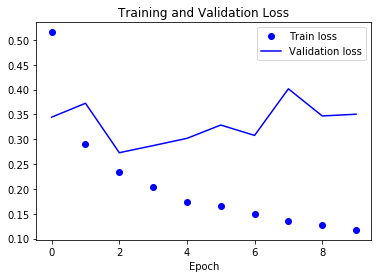

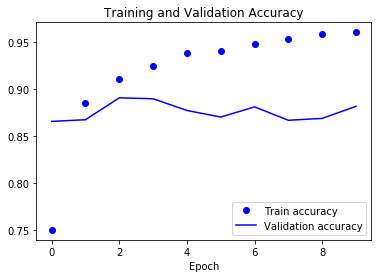

still overfitting, which is a problem that I will tackle next.


In [16]:
import matplotlib.pyplot as plt
import numpy as np

plt.plot(np.arange(10),history.history['loss'], 'bo', label  = 'Train loss')
plt.plot(np.arange(10),history.history['val_loss'], 'b', label  = 'Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.legend()

plt.show()

plt.plot(np.arange(10),history.history['acc'], 'bo', label  = 'Train accuracy')
plt.plot(np.arange(10), history.history['val_acc'], 'b', label  = 'Validation accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.legend()

plt.show()
print('still overfitting, which is a problem that I will tackle next.')

### 1. Type of Data
* Timeseries or sequential data

### 2. Use Case
* When you have data you can seperate into a time series

### 3. Application
* NLP
* Video Data, etc.

### 4. Basic Concept
* An RNN is simply an a neural network where the previous output is used as the next layers input. Often times the previous output is a raw version of the actual output of the recurrent layer, but the idea stands
* Chollet (2018) summarizes a simple RNN as such: $activation(W\cdot input + U\cdot state + b)$, where $U$ and $W$ are kernel matrices, $input$ is the inputs from the current time, $state$ is the output of the previous time 
 
### 5. Assumptions
* Previous layer has bearing on the next
* (same as with any neural network)

### 6. Existing solutions
* Keras

### 7. Strengths and Weaknesses
#### Strengths
* Great at using context to inform decisions

#### Weaknesses
* Can be vulnerable to short-term memory or vanishing gradient in some implementations
* LSTM or GRU, which avoid the above, can be more resource intensibe